> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família(opens in a new tab).
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



### Question(s) for Analysis

### Question 1:
> Does age influence the likelihood of missing an appointment?

### Question 2:
> Do patients with hypertension, diabetes, or alcoholism tend to miss appointments more often?

### Question 3:
> Does gender influence the likelihood of missing an appointment?


In [249]:
# packages will be used in this project
!pip install pandas==2.3.3 numpy==2.3.4 matplotlib==3.10.7 seaborn==0.13.2

In [250]:
# libraries will be used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling



In [251]:
# Loading the data and print out a few lines.

df = pd.read_csv('data/noshowappointments-kagglev2-may-2016.csv');
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [252]:
#at the end of the data
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [254]:
df.shape

(110527, 14)

In [255]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [256]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [257]:
# to get a quick look inside the data
for col in df.columns:
    print(df[col].name)
    print(df[col].unique())

PatientId
[2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]
AppointmentID
[5642903 5642503 5642549 ... 5630692 5630323 5629448]
Gender
['F' 'M']
ScheduledDay
['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
AppointmentDay
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']
Age


<Axes: >

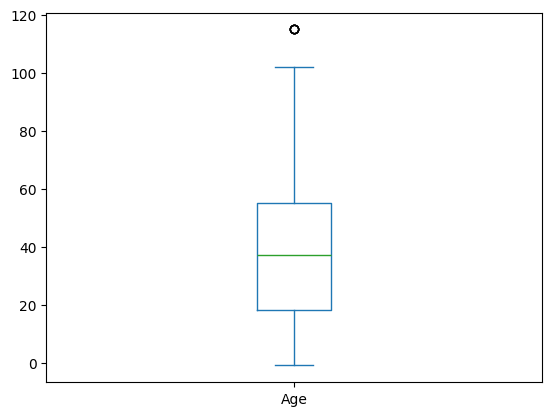

In [258]:
df.plot.box(column='Age')

In [259]:
df['Age'].min()

np.int64(-1)

In [260]:
df['Age'].max()

np.int64(115)


### Data Cleaning

 

In [261]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# We don't need the encoded patient ID, AppointmentID so we will drop them, that will make the analysis faster
df.drop(columns=['PatientId', 'AppointmentID'], inplace=True)

In [262]:
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)] # removing ages under 0 (unrealistic) and more than 100

<Axes: >

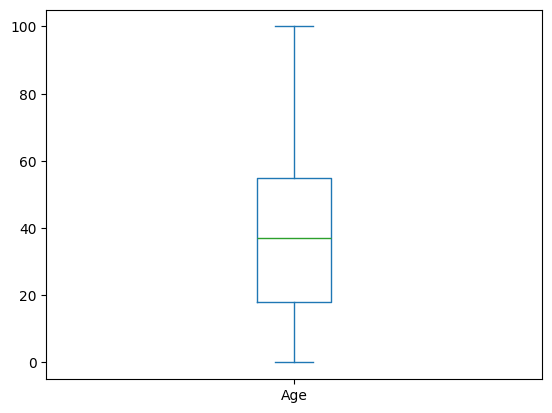

In [263]:
df.plot.box(column='Age') # after cleaning (no outliers)

In [264]:
#func to remove outlier in Age without numpy
# def remove_outliers(data):
#     for i in data.columns:
#         if data[i].dtype == "number":
#             Q1 = data[i].quantile(0.25)
#             Q3 = data[i].quantile(0.75)
#             IQR = Q3 - Q1
#             data = data[~((data[i] < (Q1 - 1.5 * IQR)) | (data[i] > (Q3 + 1.5 * IQR)))]
#     return data

# df['Age'] = remove_outliers(df['Age'])

## with numpy

# Q1 = np.percentile(df['Age'], 25)
# Q3 = np.percentile(df['Age'], 75)
# IQR = Q3 - Q1

# # filter mask
# mask = (df['Age'] >= Q1 - 1.5 * IQR) & (df['Age'] <= Q3 + 1.5 * IQR)
# df = df[mask]

In [265]:
# Create 'Multiple_Condition' column:
#  -> 1 if two or more conditions are 1, else 0 -> this will be used for visualization
df['Multiple_Condition'] = (df[['Hipertension', 'Diabetes', 'Alcoholism']].sum(axis=1) >= 2).astype(int)

# Check
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Multiple_Condition
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:
### Does age influence the likelihood of missing an appointment?

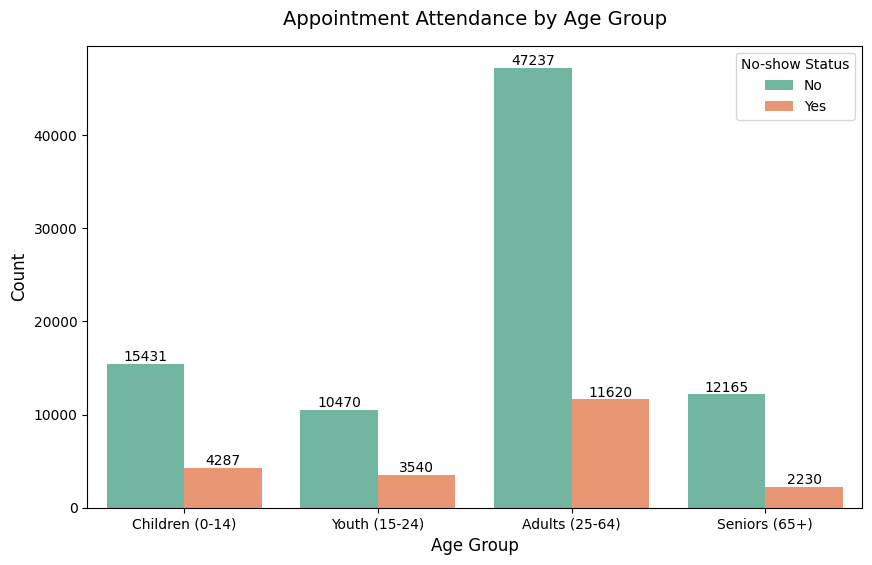

In [266]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#func

# Defining age groups
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 14, 24, 64, 120],
                        labels=['Children (0-14)', 'Youth (15-24)', 'Adults (25-64)', 'Seniors (65+)'],
                        )

# Countplot with annotations
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='AgeGroup', hue='No-show', palette='Set2')

# Adding count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Appointment Attendance by Age Group', fontsize=14, pad=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='No-show Status')
plt.show()

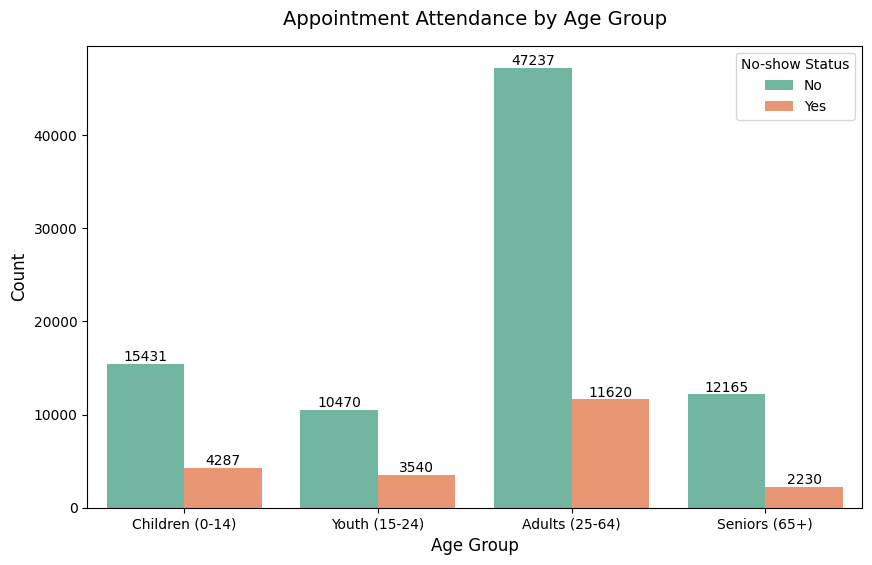

In [267]:
# Reusable function for consistent plot styling (format_plot)
def format_plot(ax, title, xlabel, ylabel):
    """Adds labels, title, and bar labels to seaborn plots."""
    ax.set_title(title, fontsize=14, pad=15)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)
    plt.legend(title='No-show Status')

plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='AgeGroup', hue='No-show', palette='Set2')
format_plot(ax, 'Appointment Attendance by Age Group', 'Age Group', 'Count')
plt.show()


### Research Question 2:
### Do patients with hypertension, diabetes, or alcoholism tend to miss appointments more often?

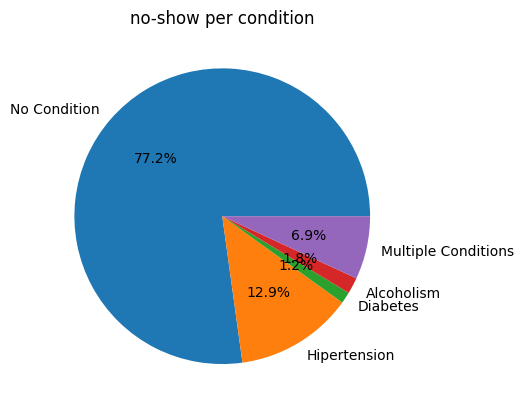

In [268]:
# Defining counts
no_condition = ((df[['Hipertension', 'Diabetes', 'Alcoholism', 'Multiple_Condition']].sum(axis=1) == 0)).sum()
hipertension_only = ((df['Hipertension'] == 1) & (df[['Diabetes', 'Alcoholism', 'Multiple_Condition']].sum(axis=1) == 0)).sum()
diabetes_only = ((df['Diabetes'] == 1) & (df[['Hipertension', 'Alcoholism', 'Multiple_Condition']].sum(axis=1) == 0)).sum()
alcoholism_only = ((df['Alcoholism'] == 1) & (df[['Hipertension', 'Diabetes', 'Multiple_Condition']].sum(axis=1) == 0)).sum()
multiple_conditions = df['Multiple_Condition'].sum()

# Prepare for pie chart
counts = [no_condition, hipertension_only, diabetes_only, alcoholism_only, multiple_conditions]

plt.pie([no_condition, hipertension_only, diabetes_only, alcoholism_only, multiple_conditions],
        labels=['No Condition', 'Hipertension', 'Diabetes', 'Alcoholism', 'Multiple Conditions'],
        autopct='%1.1f%%',
        textprops={'fontsize':10}
       )
plt.title('no-show per condition')
plt.show();


### Question 3:
### Does gender influence the likelihood of missing an appointment?

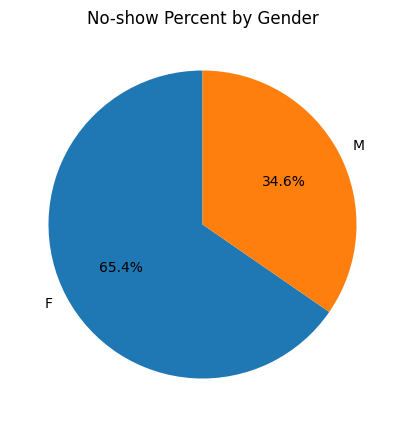

In [269]:
# Extracting the labels and values
labels = df[df['No-show'] == 'Yes']['Gender'].value_counts().index
sizes = df[df['No-show'] == 'Yes']['Gender'].value_counts().values


plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('No-show Percent by Gender')
plt.show()

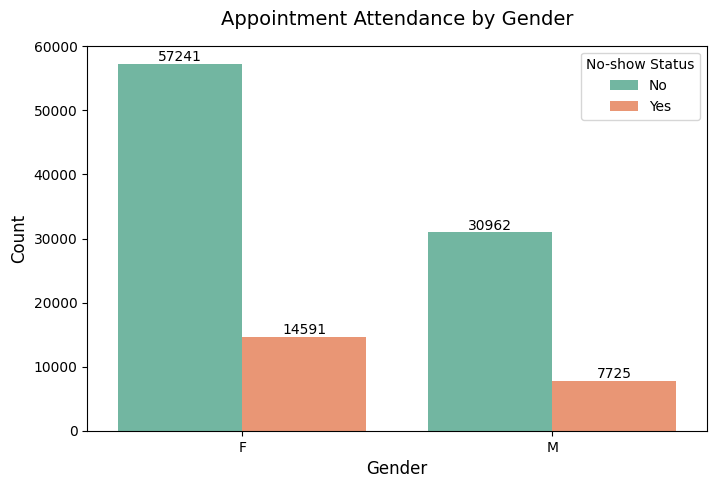

In [271]:
#using previous (format_plot) function
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='Gender', hue='No-show', palette='Set2')
format_plot(ax, 'Appointment Attendance by Gender', 'Gender', 'Count')
plt.show()

<a id='conclusions'></a>
## Conclusions

1. Age and appointment attendance:
The bar chart indicates that age appears to influence the likelihood of missing appointments. Children (0–14) and seniors (65+) have lower proportions of missed appointments compared to youth (15–24) and adults (25–64). Adults have the highest absolute number of missed appointments, but proportionally, youth have a relatively higher rate of no-shows compared to their total group. This suggests that middle-aged and younger adult patients may require more engagement or reminders to reduce missed appointments.

2. Chronic conditions and appointment attendance:
The pie chart for patients with hypertension, diabetes, alcoholism, or multiple conditions shows that the majority of patients (77.2%) have no condition. Patients with multiple conditions account for 6.9% of the population, and single conditions are less common individually. While patients with hypertension have a slightly higher share of missed appointments (12.9%), the data does not allow us to conclude causation. Additional research could explore whether management of these conditions or severity influences appointment adherence.

3. Gender and appointment attendance:
The gender distribution shows that females account for 65.4% of missed appointments, while males account for 34.6%. This reflects the underlying gender distribution in the patient population, but again, no causal conclusions can be drawn. Future analyses could examine whether gender interacts with other factors, such as age or chronic conditions, to influence no-show behavior.

## Limitations

The analysis is purely descriptive; no statistical tests were performed, so observed differences cannot be assumed to be statistically significant.

The data does not include socioeconomic, geographic, or behavioral factors, which could influence appointment attendance.

Some categories (e.g., patients with diabetes or alcoholism only) have very small counts, which limits the reliability of conclusions for those subgroups.

Further research

Investigate the effect of reminders, outreach, or scheduling flexibility on missed appointments.

Explore interactions between age, gender, and chronic conditions to identify high-risk groups.

Collect additional variables, such as distance from clinic, insurance type, or prior attendance patterns, to better understand factors contributing to no-shows.

In [272]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 521611 bytes to Investigate_a_Dataset.html
